## DATA COLLECTION

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math

cleveland = pd.read_csv('processed.cleveland.csv')
cleveland.head(10)

,Age,Sex,CP,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


## DATA WRANGLING

In [2]:
cleveland.columns = cleveland.columns.str.strip()

In [3]:
indexnames = cleveland[cleveland['thal'] == '?'].index
cleveland.drop(indexnames, inplace = True)

In [4]:
indexnames = cleveland[cleveland['ca'] == '?'].index
cleveland.drop(indexnames, inplace = True)

## DATA ANALYSIS

# SEX RATIO

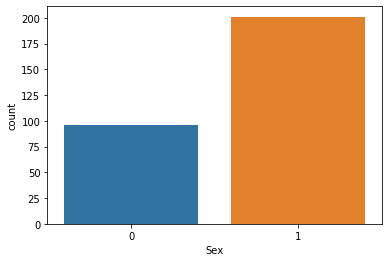

In [5]:
sns.countplot(x = 'Sex', data = cleveland)

###  REALTIONSHIP SEX - CP

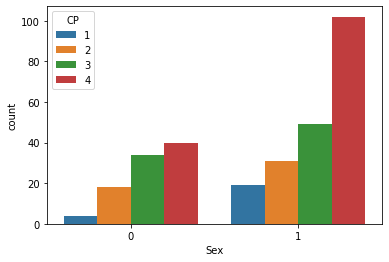

In [6]:
sns.countplot(x = 'Sex',hue = 'CP', data = cleveland)

### AGE HISTOGRAM

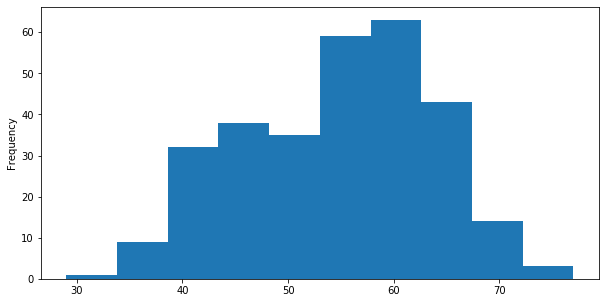

In [7]:
cleveland['Age'].plot.hist(bins = 10, figsize = [10,5])

### RESTING BLOOD PRESSURE HISTOGRAM

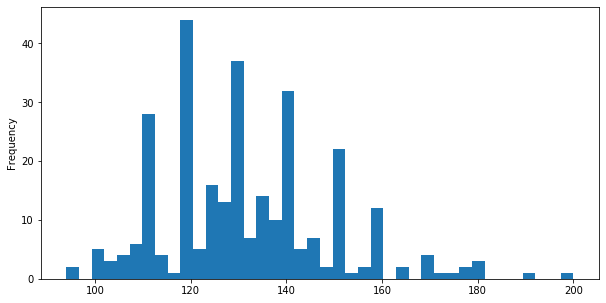

In [8]:
cleveland['trestbps'].plot.hist(bins = 40, figsize = [10,5])

### RELATIONSHIP BLOOD PRESSURE - SEX

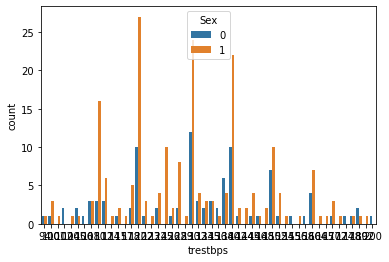

In [9]:
sns.countplot(x = 'trestbps', hue = 'Sex', data = cleveland)

### REST ECG

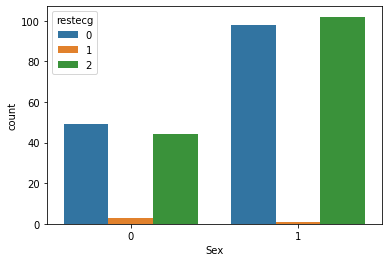

In [10]:
sns.countplot(x = 'Sex', hue = 'restecg', data = cleveland)

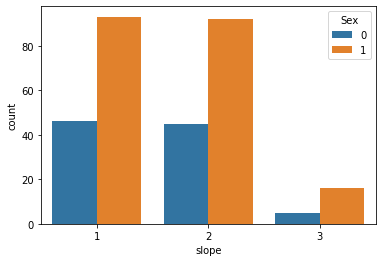

In [11]:
sns.countplot(x = 'slope', hue = 'Sex', data = cleveland)

### PREDICTION BAR GRAPH

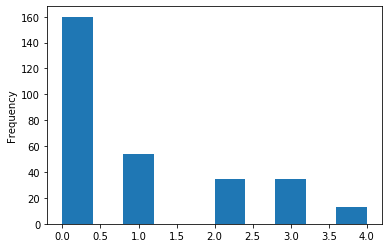

In [12]:
cleveland['num'].plot.hist()

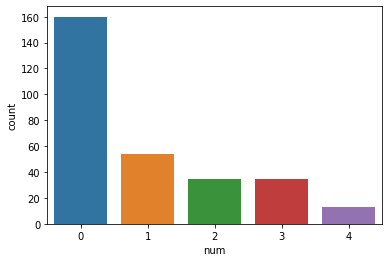

In [13]:
sns.countplot(x = 'num', data = cleveland)

### THALASMEIA MEAN

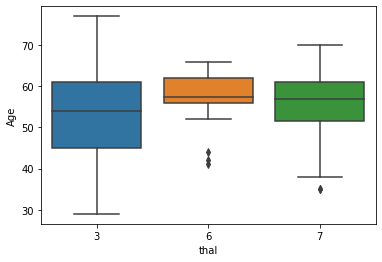

In [14]:
sns.boxplot(x = 'thal',y = 'Age', data = cleveland)

In [15]:
cleveland.dropna(inplace = True)

### HEATMAP FOR NULL VALUES

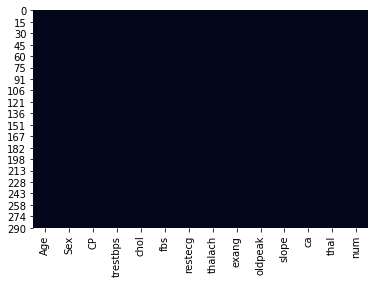

In [16]:
sns.heatmap(cleveland.isnull(),  cbar = False)

### DATA WRANGLING

#### THRESHOLDING

In [17]:
num = pd.get_dummies(cleveland['num'])
num.head(5)

,0,1,2,3,4
0,1,0,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [18]:
cleveland.replace(to_replace = 2, value = 1, inplace = True)

In [19]:
print(cleveland.head(15)['num'])

0     0
1     1
2     1
3     0
4     0
5     0
6     3
7     0
8     1
9     1
10    0
11    0
12    1
13    0
14    0
Name: num, dtype: int64


In [20]:
cleveland.replace(to_replace = 3, value = 1, inplace = True)

In [21]:
print(cleveland.head(15)['num'])

0     0
1     1
2     1
3     0
4     0
5     0
6     1
7     0
8     1
9     1
10    0
11    0
12    1
13    0
14    0
Name: num, dtype: int64


In [22]:
cleveland.replace(to_replace = 4, value = 1, inplace = True)

In [23]:
print(cleveland.head(15)['num'])

0     0
1     1
2     1
3     0
4     0
5     0
6     1
7     0
8     1
9     1
10    0
11    0
12    1
13    0
14    0
Name: num, dtype: int64


## TRAIN AND TEST

In [24]:
from sklearn.linear_model import LogisticRegression
y = cleveland['num']
X = cleveland.drop(['num'], axis = 1)
Algomodel = LogisticRegression()

In [25]:
predictors = cleveland.drop("num",axis=1)
target = cleveland["num"]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [26]:
Algomodel.fit(X_train,Y_train)

C:\Users\Rajinder\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predictions = Algomodel.predict(X_test)

## ACCURACY OF PREDICTION

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(Y_test, predictions)

array([[27,  3],
       [ 7, 23]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(Y_test, predictions)

0.8333333333333334